# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

### 1-1 寻找最短路径：BFS和DFS

In [1]:
"""
我国城市的坐标信息
"""

coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCohttp://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.jsonord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
"""
用正则表达式解析出城市的坐标
"""
import re

def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "": continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location   

In [3]:
city_info = get_city_info(coordination_source)

In [4]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [5]:
"""
计算两地距离
"""

import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("杭州","上海")   

163.0760821403945

In [7]:
"""
用现成的包计算两地距离
"""
from haversine import haversine

def get_city_distance2(city1,city2):
    lon1,lat1 = city_info[city1]
    lon2,lat2 = city_info[city2]
    return haversine([lat1,lon1],[lat2,lon2])

get_city_distance2("杭州","上海")

163.07630739067204

In [8]:
"""
用networkx可视化
"""

import networkx as nx
import matplotlib.pyplot as plt

In [9]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

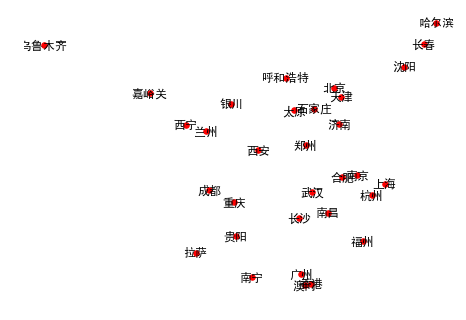

In [10]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph,city_info,with_labels=True,node_size=30)

In [11]:
"""
假设两个城市之间的距离为700公里以内就是相邻的，
建立城市之间的联系
""" 

from collections import defaultdict

threshold = 700
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2: continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [12]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'],
             '嘉峪关': ['兰州', '西宁'],
             '西宁': ['兰州', '嘉峪关', '成都', '银川'],
             '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'],
             '拉萨': ['成都', '贵阳', '重庆', '南宁'],
             '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'],
             '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'],
             '郑州': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '合肥',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'],
             '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'],
             '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'],
             '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '上海'],
             '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '上海'],
    

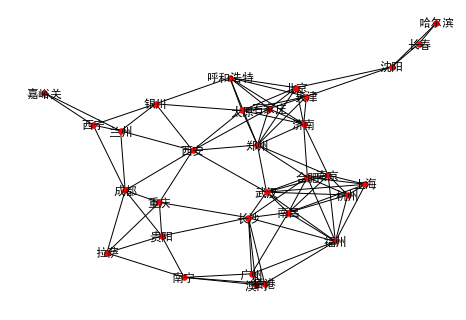

In [13]:
"""
用networkx画图
"""
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_info, with_labels=True,node_size=30)

In [14]:
"""
用BFS或DFS进行搜索，
代码上只有一处差别
"""
def search(graph, start, destination,strategy):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        successors = graph[frontier]
        
        for city in successors:
            if city in path: continue
            
            new_path = path + [city]
            
            if strategy == 'bfs':
                pathes.append(new_path)  
            elif strategy == 'dfs':
                pathes = [new_path] + pathes  
            
            if city == destination:
                return new_path
            
        visited.add(frontier)

In [15]:
search(cities_connection,"上海","香港","bfs")

['上海', '福州', '香港']

In [16]:
search(cities_connection,"上海","香港","dfs")

['上海', '福州', '香港']

In [17]:
"""
上面的代码，只要找到了路径，就返回，没有考虑最短路径；
下面修改代码，用bfs找到最短路径
"""
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance
    
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

def search_shortest(graph,start,destination,search_strategy):
    pathes = [[start]]
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        successors = graph[frontier]
        
        for city in successors:
            if city in path: continue
                
            new_path = path + [city]
            pathes.append(new_path)
            
        pathes = search_strategy(pathes)
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]

In [18]:
get_distance_of_path(["北京","济南","上海"])

1098.11914332829

In [19]:
get_distance_of_path(["北京","天津","上海"])

1069.7878955717392

In [20]:
search_shortest(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '济南', '南京', '上海']

### 1-2 机器学习初步：波斯顿房价预测与梯度下降

In [21]:
import random
from sklearn.datasets import load_boston

In [22]:
dataset = load_boston()

In [23]:
x,y = dataset["data"], dataset["target"]

In [24]:
x.shape

(506, 13)

In [25]:
y.shape

(506,)

In [26]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
from pprint import pprint

pprint(dataset["DESCR"])

('Boston House Prices dataset\n'
 '===========================\n'
 '\n'
 'Notes\n'
 '------\n'
 'Data Set Characteristics:  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive\n'
 '    \n'
 '    :Median Value (attribute 14) is usually the target\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index o

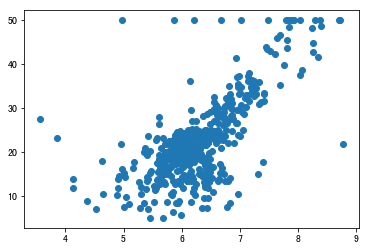

In [28]:
X_rm = x[:,5]

plt.scatter(X_rm,y)

In [29]:
"""
假设目标函数为一元线性回归函数，
用梯度下降来求参数
"""

def price(rm,k,b):
    return k * rm + b

In [30]:
"""
定义损失函数为平方误差损失函数
"""

def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [31]:
"""
计算损失关于k和b的偏导数
"""

def partial_derivative_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2/n * gradient

In [107]:
"""
初始化参数
"""

k = random.random() * 200 - 100   # -100到100
b = random.random() * 200 - 100

learning_rate = 1e-3
iteration_num = 500
losses = []

for i in range(iteration_num):
    price_pred = [price(r,k,b) for r in X_rm]
    current_loss = loss(y, price_pred)
    
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_pred)
    b_gradient = partial_derivative_b(y, price_pred)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
    
best_k = k
best_b = b

Iteration 0, the loss is 33149.22244449642, parameters k is -12.709483552795106 and b is -78.89696770362373
Iteration 1, the loss is 1140.5245578596275, parameters k is 10.294061938879953 and b is -75.27088307544149
Iteration 2, the loss is 98.19579367236632, parameters k is 14.443910155836914 and b is -74.60869760038273
Iteration 3, the loss is 64.24469914345993, parameters k is 15.191533952972643 and b is -74.48136141095671
Iteration 4, the loss is 63.130055391478, parameters k is 15.325213108182776 and b is -74.45054278980484
Iteration 5, the loss is 63.084690331563436, parameters k is 15.348103805471808 and b is -74.43714303339013
Iteration 6, the loss is 63.074149237747626, parameters k is 15.351002580878234 and b is -74.42688846537037
Iteration 7, the loss is 63.0647464976737, parameters k is 15.350294030655238 and b is -74.41720334358301
Iteration 8, the loss is 63.05538518312525, parameters k is 15.34893482034087 and b is -74.40762286464947
Iteration 9, the loss is 63.046029572

Iteration 380, the loss is 59.867944568333456, parameters k is 14.814353785991525 and b is -71.00688408002293
Iteration 381, the loss is 59.86012179549023, parameters k is 14.812980149553303 and b is -70.99814621653701
Iteration 382, the loss is 59.85230278451442, parameters k is 14.811606843436545 and b is -70.9894104542649
Iteration 383, the loss is 59.84448753359695, parameters k is 14.810233867561818 and b is -70.98067679270132
Iteration 384, the loss is 59.83667604092975, parameters k is 14.808861221849709 and b is -70.9719452313411
Iteration 385, the loss is 59.82886830470541, parameters k is 14.807488906220819 and b is -70.9632157696792
Iteration 386, the loss is 59.82106432311764, parameters k is 14.806116920595773 and b is -70.9544884072107
Iteration 387, the loss is 59.81326409436084, parameters k is 14.804745264895217 and b is -70.94576314343082
Iteration 388, the loss is 59.80546761663025, parameters k is 14.803373939039814 and b is -70.93703997783487
Iteration 389, the los

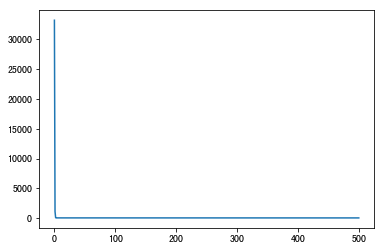

In [109]:
plt.plot(list(range(iteration_num)),losses)

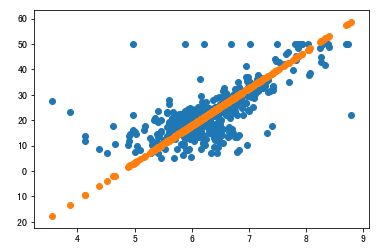

In [108]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_best_parameters)

#### 2. 回答以下理论题目

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

The required optimal conditions of BFS:
    
(1) All costs between two nodes are positive or zero.

(2) Sort the list used to maintain the searching history in every iteration.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Yes,iterative deepening depth-first search(IDDFS),which is a depth-limited version of 
depth-firset search, can find the optimal solution.

IDDFS can run DFS strategy repeatedly with increasing depth limits until the goal is found,
thus it is optimal like BFS,but uses much less memory.

At each iteration,it visits the nodes in the search tree in the same order as depth-first search,but the cumulative order in which nodes are first visited is effectively breadth-first.

The memory required of IDDFS is the same as DFS, because the maximum depth iteration is just the full depth-first search.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

(1)  BFS is optimal under certain constraints while DFS is never optimal. For example,under two required conditions mentioned above, we can find a shortest path between two nodes using BFS.

(2)  DFS has sapce complexity O($b*d$),which is smaller than BFS whose space complexity is O($b^d$),although both BFS and DFS have the same time complexity: O($b^d$)(b=branch factor,d=depth). Therefore, if the memory and disk space of our computer are insufficient and we don't care much abou finding a shortest path, we can choose DFS.

##### 2.4 When can we use machine learning ?

**We can using machine learning for the following situations**:

* you cannot code the rules: many human tasks(such as recognizing whether an email is spam or not spam) cannot be adequately solved using a simple(deterministic),rule-based solution. A large number of factors could influence the answer. When rules depend on too many factors and many of the rules overlap or need to be tuned very finely, it soon becomes difficult for a human to accurately code the rules.

* you cannot scale: you might be able to manually recognize a few hundred emails and decide whether they are spam or not. However, this task becomes tedious for millions of emails.ML solutions are effective at handling large-scale problems.

**There are also some cases that ML solutions are not good choices**. 

For example,you don't need ML if you can determine a target value by using simple rules,computations,or predetermined steps that can be programmed without needing any data-driven learning. 

##### 2.5 What is the gradient of a function ?

**The gradient is a fancy word for derivative,or the rate of change of a function**. 

It is a vector(a direction of increase) that:
    
* points in the direction of greatest increase of a function.

* Is zero at a local maximum or local minimum(because there is might no single direction of increase)

**The term "gradient" is typically used for functions with several inputs and a single ouput.** That is to say,the gradient is the derivative of a multi_variables function  $f(x,y,...)$ which packages all its partial derivative information into a vector:

![](https://ftp.bmp.ovh/imgs/2019/10/4a7b7592f0a78d0a.png)

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

We can use Gradient Descent Algorithm to find the maximum or minimum value of a function.
Gradient descent is an iterative optimimal algorithm. The general steps are as follows:
    
* to initialize the parameters to random values at first;
* to assign a very small learing rate such as 1e-3;
* to culculate the derivatives of every variables in each iteration;
* to multiply the learing rate by each derivative;
* to updatethe value of each variable by subtracting the corresponding prodcut if we want to find the minmum value of the function;
* to repeat above steps until the function converges.

If we want to find the maximum value of a function,we only need to add a minus to the function and use gradient descent to find the optimial paremeters.

#### 3. 实践部分  寻找地铁路线

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [38]:
import requests

In [39]:
url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json'
response = requests.get(url,verify=False)

In [40]:
"""
从高德地图上直接找到了北京市地铁信息的json文件，
包含北京市地铁站点的经纬度、是否换乘、线路是否环线等关键信息。
"""
import json
from pprint import pprint

subway_text = json.loads(response.text)
with open('subway_text.json','w',encoding='utf-8') as json_file:
    json.dump(subway_text,json_file,ensure_ascii=False,indent=4)

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [41]:
subway_line = {}
for l in subway_text['l']:
    line = l['ln']
    subway_station = {}
    for st in l['st']:
        subway_station[st['n']] = tuple(map(float,st['sl'].split(',')))
    subway_line[line] = subway_station

pprint(subway_line)

{'10号线': {'三元桥': (116.456997, 39.961508),
          '丰台站': (116.30454, 39.849639),
          '亮马桥': (116.461794, 39.949415),
          '健德门': (116.381353, 39.976723),
          '公主坟': (116.309919, 39.907469),
          '六里桥': (116.302808, 39.880239),
          '农业展览馆': (116.461724, 39.941344),
          '分钟寺': (116.453976, 39.852227),
          '劲松': (116.461325, 39.884387),
          '北土城': (116.394193, 39.976953),
          '十里河': (116.457983, 39.866417),
          '双井': (116.460627, 39.893479),
          '呼家楼': (116.461618, 39.923337),
          '团结湖': (116.461806, 39.933747),
          '国贸': (116.461841, 39.909104),
          '大红门': (116.399154, 39.845383),
          '太阳宫': (116.447469, 39.972678),
          '安贞门': (116.405954, 39.977005),
          '宋家庄': (116.428368, 39.845849),
          '巴沟': (116.293727, 39.974179),
          '惠新西街南口': (116.417537, 39.977121),
          '慈寿寺': (116.295467, 39.933268),
          '成寿寺': (116.447531, 39.845874),
          '泥洼': (116.304173, 39.85

In [42]:
"""
得到所有站点的经纬度坐标，
用于计算站点之间的距离。
"""

station_info = {}
for line in subway_line.values():
    station_info.update(line)
pprint(station_info)

{'T2航站楼': (116.592808, 40.079311),
 'T3航站楼': (116.615583, 40.052657),
 '七里庄': (116.294292, 39.866773),
 '万安': (116.231977, 39.984001),
 '万寿路': (116.294765, 39.907474),
 '万源街': (116.505403, 39.802971),
 '三元桥': (116.456997, 39.961508),
 '上地': (116.320193, 40.033007),
 '上岸': (116.122225, 39.905138),
 '东单': (116.41848, 39.908325),
 '东四': (116.417493, 39.92437),
 '东四十条': (116.434133, 39.933801),
 '东夏园': (116.73385, 39.903147),
 '东大桥': (116.451657, 39.923054),
 '东湖渠': (116.467412, 40.01067),
 '东直门': (116.435842, 39.941626),
 '东风北桥': (116.485919, 39.958375),
 '东高地': (116.409427, 39.805074),
 '中关村': (116.316467, 39.983991),
 '中国美术馆': (116.410803, 39.923705),
 '丰台东大街': (116.293857, 39.855111),
 '丰台南路': (116.296748, 39.840444),
 '丰台科技园': (116.297176, 39.825233),
 '丰台站': (116.30454, 39.849639),
 '临河里': (116.678811, 39.875496),
 '义和庄': (116.319079, 39.712387),
 '九棵树': (116.657533, 39.890278),
 '九龙山': (116.478695, 39.893222),
 '五棵松': (116.273987, 39.907456),
 '五福堂': (116.423903, 39.785046),
 '五道口':

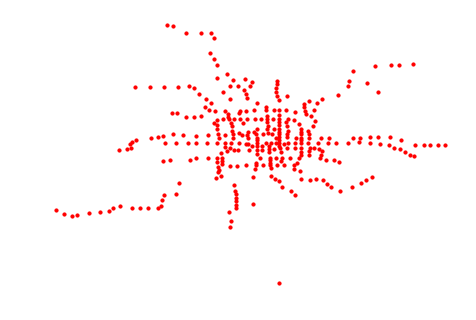

In [43]:
"""
用networkx进行可视化，
由于上面的北京市地铁图是用调整后的数据绘制的，
而下面的图用实际坐标绘制，所以有点不一样。
"""

import networkx as nx
import matplotlib.pyplot as plt

station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_info.keys()))
nx.draw(station_graph,station_info,with_labels=False,node_size=10)

In [44]:
"""
1 根据地铁换乘信息，把图以邻接列表的形式，构建出来。
2 北京市地铁分为环线和非环线，邻接列表的构建方式不同。
3 10号线和2号线是环线，而且分为内环和外环，环线的特点表现为首站和尾站相同，而内环和外环的首站又不同。
4 非环线非换乘站的首站和尾站只有一个相邻节点，中间站点则有两个相邻节点。
"""
from collections import defaultdict

station_connect = defaultdict(dict)
for l in subway_text['l']:
    line = l['ln']
    for i,st in enumerate(l['st']):
        if i == 0:
            station = l['st'][i+1]['n']
            station_connect[st['n']][station] = line
        elif i == len(l['st'])-1:
            station = l['st'][i-1]['n']
            station_connect[st['n']][station] = line
        else:
            station_up,station_down = (l['st'][i-1]['n'],l['st'][i+1]['n'])
            stations = dict(zip([station_up,station_down],[line,line]))
            station_connect[st['n']].update(stations)
            

station_connect['西直门']['积水潭'] = '2号线'
station_connect['积水潭']['西直门'] = '2号线'
station_connect['劲松']['潘家园'] = '10号线'
station_connect['潘家园']['劲松'] = '10号线'

In [45]:
print(station_connect['公主坟'])
print(station_connect['西直门'])
print(station_connect['金安桥'])
print(station_connect['石厂'])

{'万寿路': '1号线', '军事博物馆': '1号线', '莲花桥': '10号线', '西钓鱼台': '10号线'}
{'车公庄': '2号线', '新街口': '4号线大兴线', '动物园': '4号线大兴线', '大钟寺': '13号线', '积水潭': '2号线'}
{'四道桥': 'S1线', '杨庄': '6号线'}
{'小园': 'S1线'}


In [46]:
print(station_connect['奥体中心'])
print(station_connect['北土城'])

{'北土城': '8号线北段', '奥林匹克公园': '8号线北段'}
{'安华桥': '8号线北段', '奥体中心': '8号线北段', '健德门': '10号线', '安贞门': '10号线'}


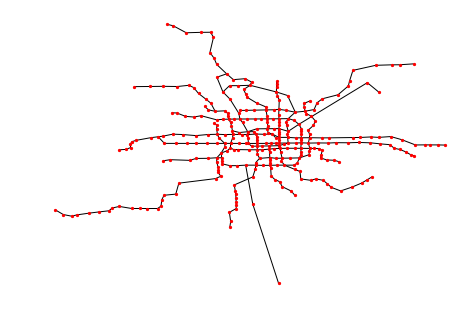

In [47]:
station_connect_graph = nx.Graph(station_connect)
nx.draw(station_connect_graph,station_info,with_labels=False,node_size=5)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [58]:
"""
使用BFS或DFS来搜索路径
"""

def search(graph, start, destination,strategy):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        successors = graph[frontier]
        
        for city in list(successors.keys()):
            if city in path: continue
            new_path = path + [city]
            
            if strategy == 'bfs':
                pathes.append(new_path)  
            elif strategy == 'dfs':
                pathes = [new_path] + pathes  
            
            if city == destination:
                print('->'.join(new_path))
                return   
        visited.add(frontier)

In [59]:
search(station_connect,"奥体中心","天安门西","bfs")

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西


In [50]:
search(station_connect,"奥体中心","天安门西","dfs")

奥体中心->奥林匹克公园->安立路->大屯路东->关庄->望京西->望京->阜通->望京南->将台->东风北桥->枣营->朝阳公园->金台路->大望路->九龙山->平乐园->北工大西门->十里河->方庄->蒲黄榆->景泰->永定门外->北京南站->陶然亭->菜市口->广安门内->达官营->湾子->北京西站->军事博物馆->白堆子->白石桥南->国家图书馆->魏公村->人民大学->海淀黄庄->知春里->知春路->大钟寺->西直门->积水潭->鼓楼大街->安德里北街->安华桥->北土城->安贞门->惠新西街南口->芍药居->光熙门->柳芳->东直门->三元桥->亮马桥->农业展览馆->团结湖->呼家楼->金台夕照->国贸->永安里->建国门->北京站->崇文门->东单->灯市口->东四->南锣鼓巷->北海北->平安里->车公庄->阜成门->复兴门->长椿街->宣武门->西单->天安门西


### (Optional) Improve your agent to make it able to find a path based on different strategies

Some ideas you might want to try:

a. Find the shortest path between two stations.

In [51]:
"""
用BFS，对于某个站点，每次小循环找下一站，就利用上面计算距离的函数，计算当前所有路线的距离。
对当前的所有路径按距离进行排序，距离最短的路线排在前面。
继续循环搜索，当搜索到终点站时，输出结果。
由于每次大循环都从距离最短的路线开始，所以搜索到终点站时，距离也是最短的。
"""
def get_city_distance(city1,city2):
    return geo_distance(station_info[city1],station_info[city2])

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance
    
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

def search_shortest(graph,start,destination,search_strategy):
    pathes = [[start]]
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        successors = graph[frontier]
        
        for city in list(successors.keys()):
            if city in path: continue
                
            new_path = path + [city]
            pathes.append(new_path)
            
        pathes = search_strategy(pathes)
        if pathes and (destination == pathes[0][-1]):
            print('->'.join(pathes[0]))
            return 

In [52]:
search_shortest(station_connect,"奥体中心","天安门西",sort_by_distance)

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->东四->灯市口->东单->王府井->天安门东->天安门西


In [53]:
"""
计算纯BFS和用最短路径的BFS搜索的路径的距离
比较一下，看最短路径的算法是否正确
"""
search(station_connect,"奥体中心","天安门西","bfs")
search_shortest(station_connect,"奥体中心","天安门西",sort_by_distance)

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西
奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->东四->灯市口->东单->王府井->天安门东->天安门西


In [54]:
path_bfs = "奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西".split("->")
path_shortest = "奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->东四->灯市口->东单->王府井->天安门东->天安门西".split("->")

In [55]:
if get_distance_of_path(path_bfs) >= get_distance_of_path(path_shortest):
    print("最短路径算法输出结果正确！")

最短路径算法输出结果正确！


b. Find the path that requires minimum transfers between two stations.

In [88]:
"""
方法1：先用BFS尽可能多找出几条路径，由于BFS像超声波一样从内向外搜索，所以其实前几条路径就包含了换乘最少的路径。
      所以我把visited 这个判断条件去掉，而单独把找到的路线放在 pathes_target这个列表里，找到前10条路径时，就跳出循环。
      再计算每条路径的换乘次数，进行排序，输出换乘最少的路径。
"""

def get_transfer_of_path(path):
    transfer_num = len(set(path.values()))-1
    return transfer_num

def sort_by_transfer(pathes):
    return sorted(pathes,key=get_transfer_of_path)

def search_transfer_1(graph, start, destination, search_strategy):
    pathes = [{start:'start'}]
    pathes_target = []
    
    while pathes:
        path = pathes.pop(0)
        frontier = list(path.items())[-1][0]      
        successors = graph[frontier]

        for city,line in successors.items():
            if city in path: continue
            new_path = dict(path,**{city:line})

            if city == destination:
                pathes_target.append(new_path)
                continue
            pathes.append(new_path)
        
        if len(pathes_target) > 10:
            break
            
    pathes_sorted = search_strategy(pathes_target)
    print('->'.join(list(pathes_sorted[0].keys())))
    return

In [81]:
search_transfer_1(station_connect,"奥体中心","天安门西",sort_by_transfer)

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西


In [74]:
"""
方法2：借鉴上面找最短距离路线的方法，写一个计算换乘的函数，用来在每次小循环结束后，对当前所有路线进行排序。
      用BFS，对于某个站点，每次小循环找完下一站，就利用计算换乘次数的函数，计算当前所有路线的换乘次数。
      对当前的所有路径按换乘次数进行排序，换乘最少的路线排在前面。
      继续循环搜索，当搜索到终点站时，输出结果。
      由于每次大循环都从换乘最少的路线开始，所以搜索到终点站时，换乘也是最少的。
"""

def get_transfer_of_path(path):
    transfer_num = len(set(path.values()))-1
    return transfer_num

def sort_by_transfer(pathes):
    return sorted(pathes,key=get_transfer_of_path)

def search_transfer_2(graph, start, destination, search_strategy):
    pathes = [{start:'start'}]
    
    while pathes:
        path = pathes.pop(0)
        frontier = list(path.items())[-1][0]      
        successors = graph[frontier]

        for city,line in successors.items():
            if city in path: continue
            new_path = dict(path,**{city:line})
            pathes.append(new_path)
        
        pathes = search_strategy(pathes)
        if pathes and (list(pathes[0].keys())[-1] == destination):
            print('->'.join(list(pathes[0].keys())))
            return

In [75]:
search_transfer_2(station_connect,"奥体中心","天安门西",sort_by_transfer)

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西


In [82]:
search_transfer_1(station_connect,"奥体中心","天安门西",sort_by_transfer)

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西


把距离最短的算法和换乘最少的算法进行比较，可以看到，从奥体中心到五道口，换乘最少的路线，远比距离最短的路线的站点要多很明显，这里我们应该选择距离最短的路线。

In [89]:
search_transfer_1(station_connect,"奥体中心","五道口",sort_by_transfer)

奥体中心->奥林匹克公园->森林公园南门->林萃桥->永泰庄->西小口->育新->霍营->回龙观->龙泽->西二旗->上地->五道口


In [90]:
search_shortest(station_connect,"奥体中心","五道口",sort_by_distance)

奥体中心->北土城->健德门->牡丹园->西土城->知春路->五道口


c. Combine the previous two ideas, find a more suitable path.

如果出现上面的情况，换乘最少的路线和距离最短的路线不相同，那么要在换乘和距离之间权衡。

站内换乘的时间=步行(2分钟)+候车时间(1-2分钟)，大概为4分钟，
而如果不换乘，那么4分钟内，地铁停靠花去1分钟，大概能跑3分钟。以北京地铁时速最高80公里算，
那么少换乘一站的收益约等价于距离缩短4公里（80*3/60)。

那么我计算一个比值：

比值 = 两条路线的距离之差/两条路线的换乘次数之差

其中：

两条路线的距离之差 = 换乘最少的路线的距离 - 距离最短的路线的距离

两条路线的换乘次数之差 = 距离最短的路线的换乘次数 - 换乘最少的路线的换乘次数，

以4为阈值，比值大于4，则取距离最短的路线，小于4，则取换乘最少的路线。

In [93]:
def get_city_distance(city1,city2):
    return geo_distance(station_info[city1],station_info[city2])

def get_distance_of_path(path):
    distance = 0
    path = list(path.keys())
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance
    
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)


def get_transfer_of_path(path):
    transfer_num = len(set(path.values()))-1
    return transfer_num

def sort_by_transfer(pathes):
    return sorted(pathes,key=get_transfer_of_path)


def search_transfer_merge(graph, start, destination, threshold,sort_by_distance,sort_by_transfer):
    pathes = [{start:'start'}]
    pathes_target = []
    
    while pathes:
        path = pathes.pop(0)
        frontier = list(path.items())[-1][0]      
        successors = graph[frontier]

        for city,line in successors.items():
            if city in path: continue
            new_path = dict(path,**{city:line})

            if city == destination:
                pathes_target.append(new_path)
                continue
            pathes.append(new_path)
        
        if len(pathes_target) > 10:
            break
            
    pathes_sorted_dist = sort_by_distance(pathes_target)
    pathes_sorted_trans = sort_by_transfer(pathes_target)
    
    if (pathes_sorted_dist[0] == pathes_sorted_trans[0]):
        print('->'.join(list(pathes_sorted_dist[0].keys())))
    else:
        diff_dist = get_distance_of_path(pathes_sorted_trans[0]) - get_distance_of_path(pathes_sorted_dist[0])
        diff_trans = get_transfer_of_path(pathes_sorted_dist[0]) - get_transfer_of_path(pathes_sorted_trans[0])
        if diff_dist / diff_trans > threshold:
            print('->'.join(list(pathes_sorted_dist[0].keys())))
        else:
            print('->'.join(list(pathes_sorted_trans[0].keys())))
    return

In [94]:
search_transfer_merge(station_connect,"奥体中心","五道口",4, sort_by_distance,sort_by_transfer)

奥体中心->北土城->健德门->牡丹园->西土城->知春路->五道口


Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 